In [1]:
from v2.env import GymLinearEnv, PreprocessLinearEnv
from v2.features import aggregate, tab2lin
from v2.agents import qlearning
from v2.utils import compose, linear_decay_clip
import v2.plot as Plot
from v2.interact import test_env
import v2.policies as P
import numpy as np
import gym

In [2]:
env = GymLinearEnv(gym.make('MountainCar-v0'))
lows, highs = env.lows, env.highs
print(f'Number of Features: {env.n_features}')
print(f'Position: [{lows[0]}, {highs[0]}]')
print(f'Velocity: [{lows[1]}, {highs[1]}]')
print(f'Number of Actions: {env.n_actions}')
intervals = [10, 10]
preprocess = compose(
    aggregate(lows, highs, intervals),
    tab2lin(np.prod(intervals)))
env = PreprocessLinearEnv(env, preprocess)
hist, qf = qlearning(
    env, discount=1, train_ts=int(5e5),
    epsilon=linear_decay_clip(0, 0, 1),
    lr=0.1, nstep=1)

Number of Features: 2
Position: [-1.2000000476837158, 0.6000000238418579]
Velocity: [-0.07000000029802322, 0.07000000029802322]
Number of Actions: 3


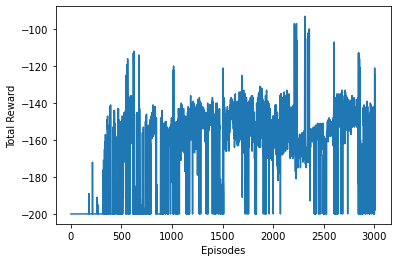

In [3]:
Plot.history(hist)

In [26]:
%matplotlib qt
Plot.value_function_2d(
    lambda state: max(qf(preprocess(state))),
    lows, highs, intervals=100, zlabel='State Values',
    xlabel='Position', ylabel='Velocity',
    title='MountainCar-v0', invert_z=True)

In [28]:
%matplotlib qt
Plot.value_function_2d(
    lambda state: max(qf(preprocess(state))),
    lows, highs, intervals=10, zlabel='State Value Function',
    xlabel='Position', ylabel='Velocity',
    title='MountainCar-v0 - Q-Learning - State Values', heatmap=True)

In [12]:
input()
test_env(env, P.act_e_greedy(env.rand_action, 0, qf))

118
Total Reward: -119.0
